## Diamond Dataset

In [1]:
import seaborn as sns
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data2 = sns.load_dataset("diamonds")

In [3]:
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data2["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [5]:
data2.loc[data2['cut'] == "Ideal", 'cut'] = 0
data2.loc[data2['cut'] == "Premium", 'cut'] = 1
data2.loc[data2['cut'] == "Very Good", 'cut'] = 2
data2.loc[data2['cut'] == "Good", 'cut'] = 3
data2.loc[data2['cut'] == "Fair", 'cut'] = 4

In [6]:
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [7]:
data2.loc[data2['color'] == "D", 'color'] = 0
data2.loc[data2['color'] == "E", 'color'] = 1
data2.loc[data2['color'] == "F", 'color'] = 2
data2.loc[data2['color'] == "G", 'color'] = 3
data2.loc[data2['color'] == "H", 'color'] = 4
data2.loc[data2['color'] == "I", 'color'] = 5
data2.loc[data2['color'] == "J", 'color'] =6

In [8]:
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
data2["clarity"].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [10]:
data2.loc[data2['clarity']=='SI1','clarity']=0
data2.loc[data2['clarity']=='VS2','clarity']=1
data2.loc[data2['clarity']=='SI2','clarity']=2
data2.loc[data2['clarity']=='VS1','clarity']=3
data2.loc[data2['clarity']=='VVS2','clarity']=4
data2.loc[data2['clarity']=='VVS1','clarity']=5
data2.loc[data2['clarity']=='IF','clarity']=6
data2.loc[data2['clarity']=="I1",'clarity']=7
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
target = data2["price"]
df1 = data2.drop(['price'], axis = 1)

In [12]:
target.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

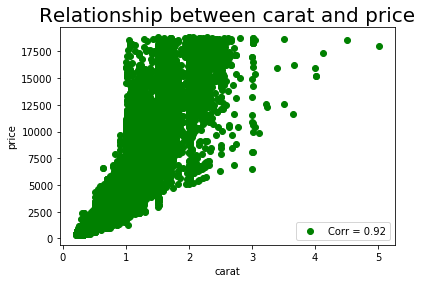

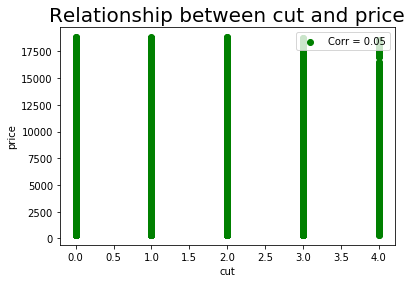

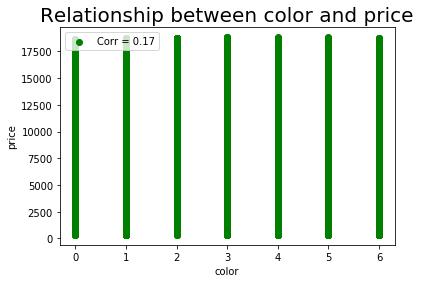

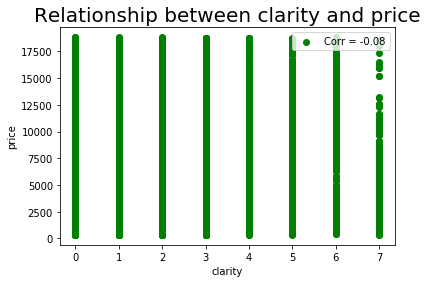

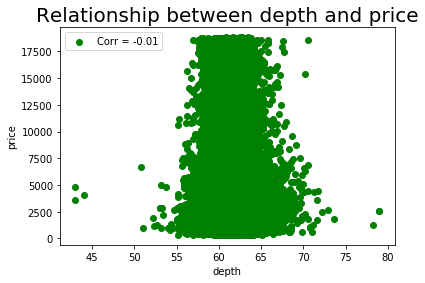

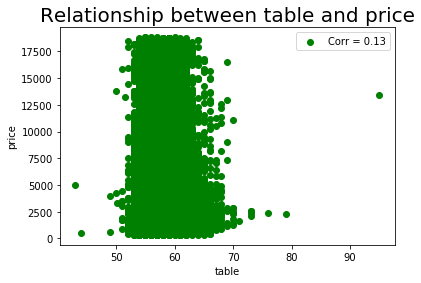

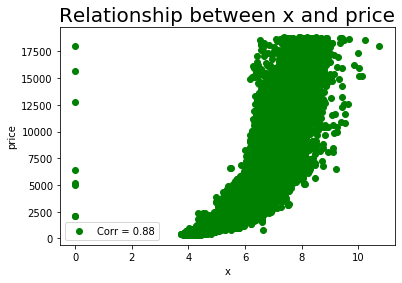

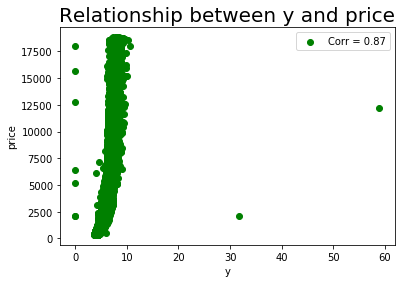

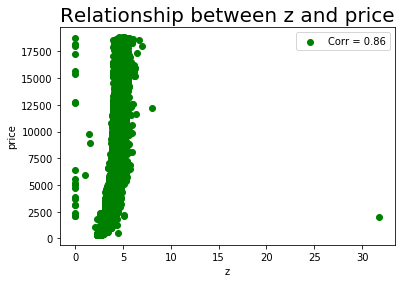

In [19]:
for columns in df1:
    corr = np.corrcoef(df1[columns],target)[0][1]
    plt.title(f"Relationship between {columns} and price" , fontsize="20")
    plt.scatter(df1[columns],target, label=f'Corr = {corr:.2f}',color="green")
    plt.xlabel(columns)
    plt.ylabel("price")
    plt.legend()
    plt.show()

In [14]:
scaled = StandardScaler()

In [15]:
scaled_df1 = scaled.fit_transform(df1)

In [16]:
X_train , X_test , y_train,y_test = train_test_split(scaled_df1,target,random_state=90)

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred = model.predict(X_test)
print("Accuracy of Model: ", r2_score(y_test, y_pred))
print("Error of Model: ", mean_absolute_error(y_test, y_pred) )

Accuracy of Model:  0.8802742992659585
Error of Model:  845.9401858190474
